In [79]:
# Basic Lib
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Preprocessing lib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Importing lib for Model training and prediction
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [49]:
df = pd.read_csv(r"C:\Users\prashant\Downloads\archive\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
df.shape

(10000, 14)

In [52]:
df.columns=df.columns.str.strip()

In [53]:
df.columns=df.columns.str.lower()

In [54]:
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [55]:
df.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [56]:
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


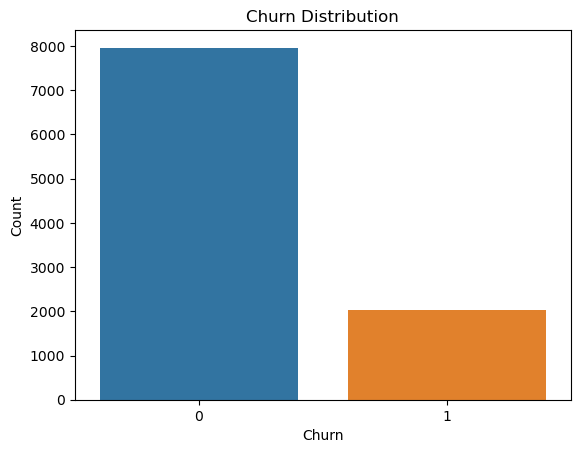

In [57]:
sns.countplot(x='exited', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


In [58]:
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

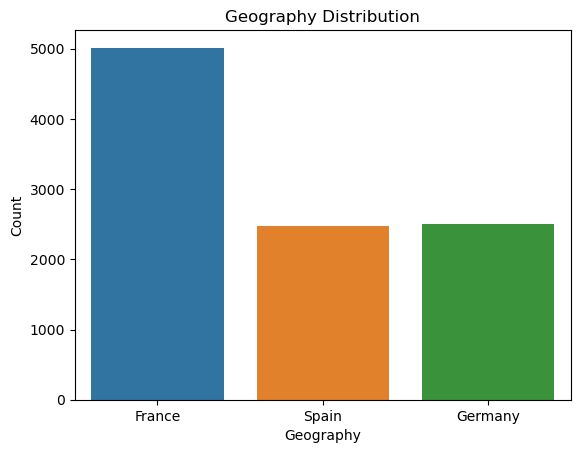

In [59]:
# 2. Distribution of Geography
sns.countplot(x='geography', data=df)
plt.title("Geography Distribution")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

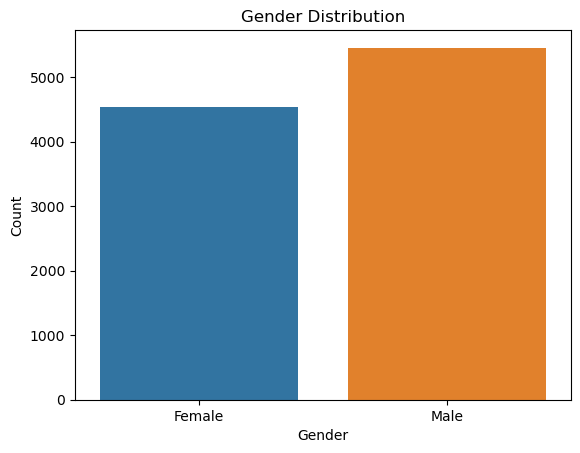

In [60]:
# 3. Distribution of Gender
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


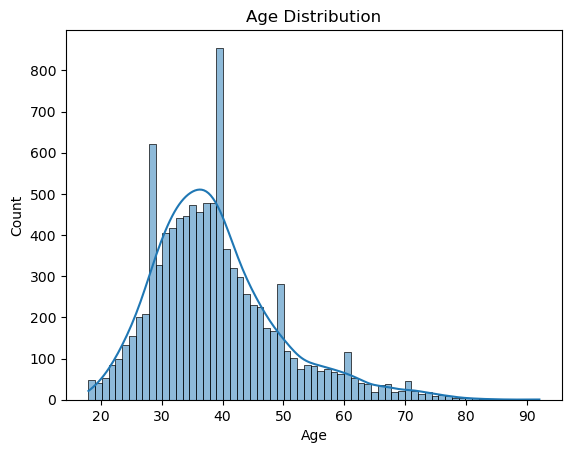

In [61]:
# 4. Age Distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

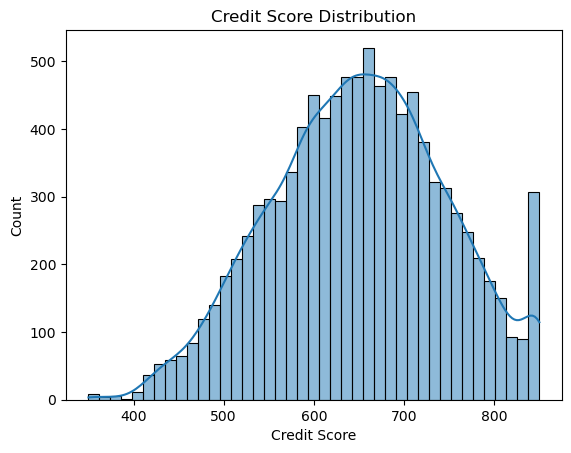

In [62]:
# 5. Credit Score Distribution
sns.histplot(df['creditscore'], kde=True)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

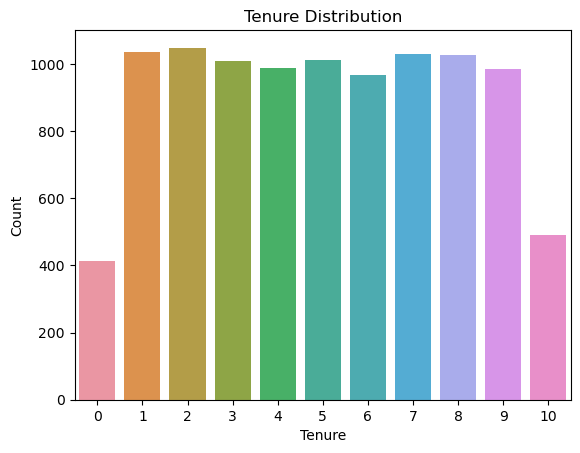

In [63]:
# 6. Tenure Distribution
sns.countplot(x='tenure', data=df)
plt.title("Tenure Distribution")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

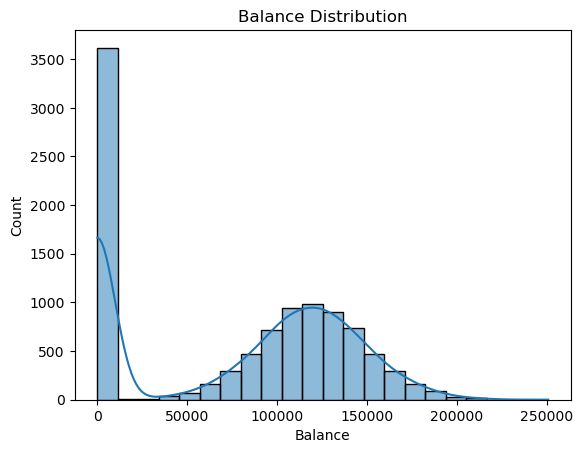

In [64]:
# 7. Balance Distribution
sns.histplot(df['balance'], kde=True)
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Count")
plt.show()

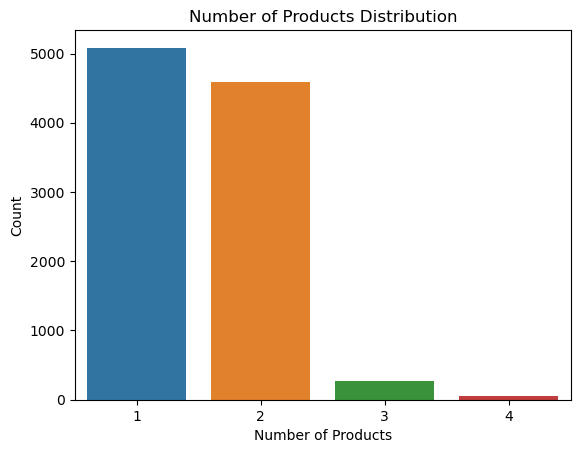

In [65]:
# 8. Number of Products Distribution
sns.countplot(x='numofproducts', data=df)
plt.title("Number of Products Distribution")
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.show()

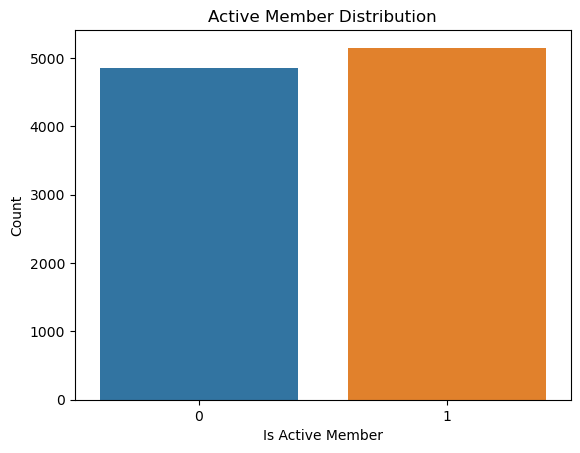

In [66]:
# 9. Active Member Distribution
sns.countplot(x='isactivemember', data=df)
plt.title("Active Member Distribution")
plt.xlabel("Is Active Member")
plt.ylabel("Count")
plt.show()

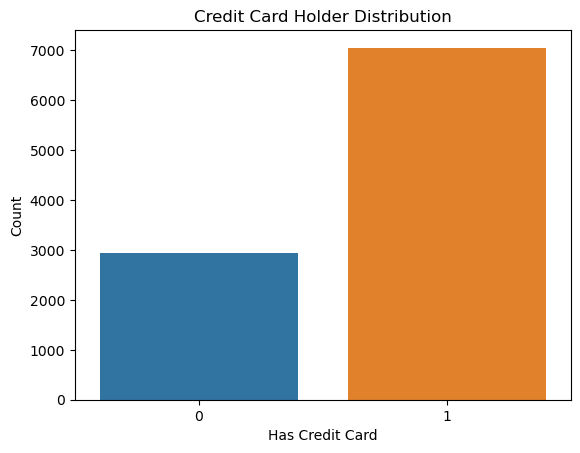

In [67]:
# 10. Credit Card Holder Distribution
sns.countplot(x='hascrcard', data=df)
plt.title("Credit Card Holder Distribution")
plt.xlabel("Has Credit Card")
plt.ylabel("Count")
plt.show()

In [68]:
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Geography'
df['geography_encoded'] = label_encoder.fit_transform(df['geography'])

# Encode 'Gender'
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

In [75]:
scaler = StandardScaler()
numerical_features = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [81]:
X = df.drop(['exited', 'surname', 'customerid', 'rownumber','geography','gender'], axis=1)  # Remove irrelevant columns
y = df['exited']

In [82]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [84]:
# Create and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.89
Confusion Matrix:
[[1455  178]
 [ 168 1385]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1633
           1       0.89      0.89      0.89      1553

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186

